In [2]:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, save
import plotly.graph_objects as go
import sklearn
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
pd.plotting.register_matplotlib_converters()

In [68]:
train_df = pd.read_csv('train.csv') #Loading Train Data
test_df = pd.read_csv('test.csv') #Loading Test data
all_data = pd.concat([train_df,test_df],axis = 0) #Combining the dataset
all_data.reset_index(drop = True) #reset the index and droping our current index

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,ForecastId
0,1.0,NaN,Afghanistan,2020-01-22,0.0,0.0,NaN
1,2.0,NaN,Afghanistan,2020-01-23,0.0,0.0,NaN
2,3.0,NaN,Afghanistan,2020-01-24,0.0,0.0,NaN
3,4.0,NaN,Afghanistan,2020-01-25,0.0,0.0,NaN
4,5.0,NaN,Afghanistan,2020-01-26,0.0,0.0,NaN
...,...,...,...,...,...,...,...
36715,NaN,NaN,Zimbabwe,2020-05-03,NaN,NaN,13154.0
36716,NaN,NaN,Zimbabwe,2020-05-04,NaN,NaN,13155.0
36717,NaN,NaN,Zimbabwe,2020-05-05,NaN,NaN,13156.0
36718,NaN,NaN,Zimbabwe,2020-05-06,NaN,NaN,13157.0


In [12]:
train_df.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [38]:
all_data.shape

(36720, 7)

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23562 entries, 0 to 23561
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              23562 non-null  int64  
 1   Province_State  10010 non-null  object 
 2   Country_Region  23562 non-null  object 
 3   Date            23562 non-null  object 
 4   ConfirmedCases  23562 non-null  float64
 5   Fatalities      23562 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.1+ MB


In [36]:
train_df.shape

(23562, 6)

In [14]:
# To know how many unique country data we have

train_df['Country_Region'].nunique()

180

In [54]:
train_df.shape

(23562, 6)

In [56]:
train_df.Province_State.isnull().sum() 
#To see number of rows that has null values

13552

Out of 180 countries data, we have only 8 countries who has given Province wise data for Corona confirmed and fatalities. Hence, alot of this missing data would not be good for our dataset, and hence we will drop this column.

In [84]:
ind = np.where(train_df.Province_State.notnull())
prov_df=df.iloc[ind]
grp=prov_df.groupby('Country_Region')
grp.groups
grp.Country_Region.nunique().sum()


# 8 Countries has province data

8

In [85]:
train_df.drop('Province_State' , axis = 1 , inplace = True)

In [86]:
train_df.head()

,Id,Country_Region,Date,ConfirmedCases,Fatalities
0,1,Afghanistan,2020-01-22,0.0,0.0
1,2,Afghanistan,2020-01-23,0.0,0.0
2,3,Afghanistan,2020-01-24,0.0,0.0
3,4,Afghanistan,2020-01-25,0.0,0.0
4,5,Afghanistan,2020-01-26,0.0,0.0


In [87]:
#Converting string data to actual date format

train_df.Date = pd.to_datetime(train_df.Date)

In [89]:
train_df.set_index('Date' , inplace = True)

In [90]:
train_df.head()

,Id,Country_Region,ConfirmedCases,Fatalities
Date,,,,
2020-01-22,1,Afghanistan,0.0,0.0
2020-01-23,2,Afghanistan,0.0,0.0
2020-01-24,3,Afghanistan,0.0,0.0
2020-01-25,4,Afghanistan,0.0,0.0
2020-01-26,5,Afghanistan,0.0,0.0


Exploratory Data Analysis
We will try to answer following questions:

Q1. Which countries has high number of cases?

Q2. How is confirmed cases increases by day?

Q3. What is fatality rate of confirmed cases?

Q4. How is cases increasing by day of 1st reported case?

Q5. Understanding data of India and UK and comparing it with the world?

Q6. What is new rate of increase per case per day?

# Q1. Which countries has high number of cases?

In [92]:
#Q1 

train_df.head()

,Id,Country_Region,ConfirmedCases,Fatalities
Date,,,,
2020-01-22,1,Afghanistan,0.0,0.0
2020-01-23,2,Afghanistan,0.0,0.0
2020-01-24,3,Afghanistan,0.0,0.0
2020-01-25,4,Afghanistan,0.0,0.0
2020-01-26,5,Afghanistan,0.0,0.0


In [94]:
grp1 = train_df.groupby(['Country_Region'])

In [98]:
q1_df = grp1.ConfirmedCases.sum()

In [101]:
q1_df.head()

Country_Region
Afghanistan     3454.0
Albania         4526.0
Algeria        13294.0
Andorra         6081.0
Angola           129.0
Name: ConfirmedCases, dtype: float64

In [103]:
q1_df.sort_values(ascending = False)

Country_Region
China               4764627.0
US                  3222547.0
Italy               2078445.0
Spain               1614510.0
Germany             1249835.0
                      ...    
Botswana                 41.0
Sierra Leone             29.0
Burundi                  22.0
Papua New Guinea         21.0
Timor-Leste              17.0
Name: ConfirmedCases, Length: 180, dtype: float64

From the data we can observe that China holds the top position with number of cases being found

Below Graph gives us the analysis of how the cases increased with time

 # Q2. How is confirmed cases increases by day?

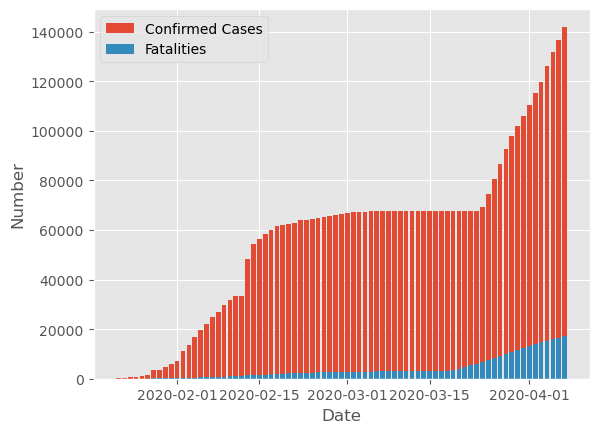

In [164]:
plt.bar(train_df.index , train_df.ConfirmedCases)
plt.bar(train_df.index , train_df.Fatalities)

plt.xlabel('Date')
plt.ylabel('Number')

plt.legend(['Confirmed Cases' , 'Fatalities'] , loc = 'upper left')

#World Covid Cases

As we can observe that in the month of April we saw more number of cases
compared to February.

# Q3. What is fatality rate of confirmed cases?

In [143]:
latest_df = grp1.sum().sort_values(['ConfirmedCases'] , ascending = False)[:10]

In [148]:
latest_df

,Id,ConfirmedCases,Fatalities
Country_Region,,,
China,19131189,4764627.0,169091.0
US,115170363,3222547.0,77343.0
Italy,1197658,2078445.0,223179.0
Spain,1790866,1614510.0,137486.0
Germany,1041117,1249835.0,14032.0
France,9710855,987338.0,72246.0
Iran,1164702,915866.0,58527.0
United Kingdom,24211495,467602.0,38835.0
"Korea, South",1247092,328015.0,3935.0


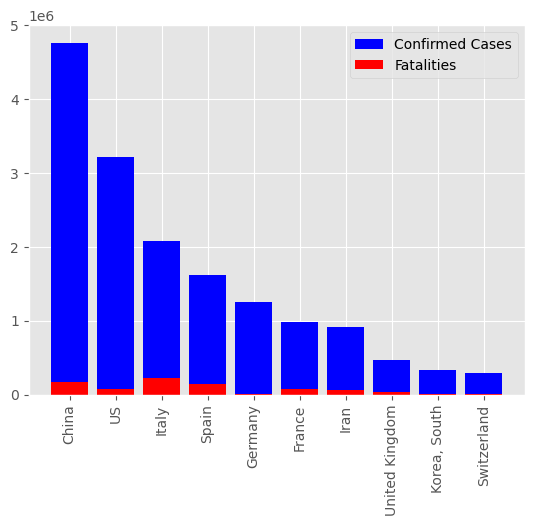

In [163]:
plt.xticks(rotation=90)
plt.bar(latest_df.index , latest_df.ConfirmedCases , color = 'b')
plt.bar(latest_df.index , latest_df.Fatalities , color = 'r')
plt.legend(['Confirmed Cases' , 'Fatalities'])

Above graph shows us the fatality rate and the confirmed Cases.

# Q4. How is cases increasing by day of 1st reported case?

In [264]:
grp2_df = train_df.groupby(['Date','Country_Region']).ConfirmedCases.sum().reset_index().set_index('Date')

In [265]:
grp2_df

,Country_Region,ConfirmedCases
Date,,
2020-01-22,Afghanistan,0.0
2020-01-22,Albania,0.0
2020-01-22,Algeria,0.0
2020-01-22,Andorra,0.0
2020-01-22,Angola,0.0
...,...,...
2020-04-07,Venezuela,165.0
2020-04-07,Vietnam,249.0
2020-04-07,West Bank and Gaza,261.0


In [268]:
list_of_countries  = set(list(latest_df.index))
    

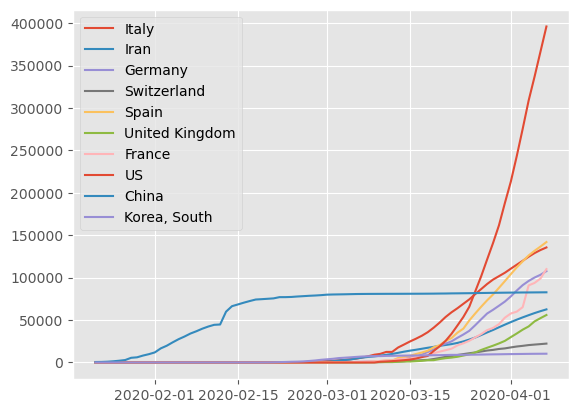

In [271]:
for i in list_of_countries:
    plt.plot(grp2.iloc[np.where(grp2_df.Country_Region == i)].index , grp2.iloc[np.where(grp2_df.Country_Region == i)].ConfirmedCases)
plt.legend(list_of_countries)


# Q5. Understanding data of India and UK and comparing it with the world?

In [284]:
q5_df = train_df.iloc[np.where((train_df.Country_Region == 'India') | (train_df.Country_Region == 'United Kingdom') )]

In [290]:
q5_df.describe()

,Id,ConfirmedCases,Fatalities
count,847.000000,847.000000,847.000000
mean,29940.636364,592.452184,46.911452
std,4764.362714,4275.154918,413.088975
min,14874.000000,0.000000,0.000000
25%,31088.500000,0.000000,0.000000
50%,31390.000000,0.000000,0.000000
75%,31691.500000,4.000000,0.000000
max,31963.000000,55242.000000,6159.000000


In [292]:
q5_df_group = q5_df.groupby('Country_Region').sum()

In [293]:
q5_df_group

,Id,ConfirmedCases,Fatalities
Country_Region,,,
India,1148224,34205.0,899.0
United Kingdom,24211495,467602.0,38835.0


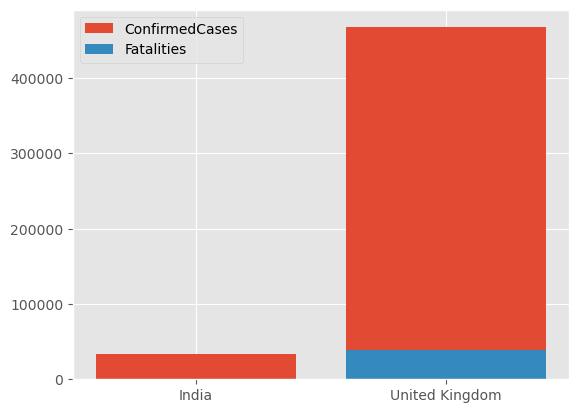

In [301]:
plt.bar(q5_df_group.index , q5_df_group.ConfirmedCases )
plt.bar(q5_df_group.index , q5_df_group.Fatalities )

plt.legend(['ConfirmedCases' , 'Fatalities'])

UK has the highest number of confirmed cases and fatalities as compared to India 

# Q6. What is new rate of increase per case per day?

In [358]:
train_df.head()
grp12 = train_df.groupby(train_df.index).sum()

In [363]:
grp12['Rate_of_Increase'] = grp12['ConfirmedCases'].diff()

In [364]:
grp12

,Id,ConfirmedCases,Fatalities,Rate_of_Increase
Date,,,,
2020-01-22,4993461,554.0,17.0,NaN
2020-01-23,4993767,653.0,18.0,99.0
2020-01-24,4994073,939.0,26.0,286.0
2020-01-25,4994379,1432.0,42.0,493.0
2020-01-26,4994685,2113.0,56.0,681.0
...,...,...,...,...
2020-04-03,5015493,1095739.0,58782.0,82758.0
2020-04-04,5015799,1197225.0,64601.0,101486.0
2020-04-05,5016105,1271928.0,69369.0,74703.0


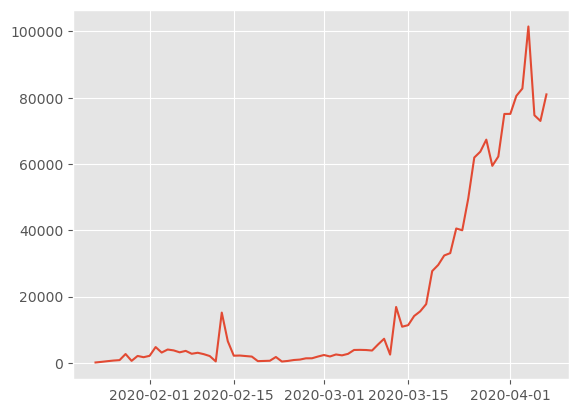

In [365]:
plt.plot(grp12.index , grp12.Rate_of_Increase)